# Homework-4: MLP and ConvNet for MNIST Classification
### In this homework, we need to
- #### implement MLP using PyTorch (`models/MLP.py`)
- #### implement ConvNet using PyTorch (`models/CNN.py`)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

from tqdm import tqdm, trange
from utils.trainer import train
from utils.tester import test
from utils.plot import plot_loss_and_acc

## Load MNIST Dataset

In [2]:
train_data = datasets.MNIST(
    root="data", train=True, download=True, transform=transforms.ToTensor()
)
test_data = datasets.MNIST(
    root="data", train=False, download=True, transform=transforms.ToTensor()
)

## Hyperparameters

In [3]:
args = {
    "batch_size" : 100,
    "max_epoch" : 10,
    "learning_rate" : 0.001,
    "weight_decay": 0.005
}

## Create Data Loaders

In [4]:
train_loader = DataLoader(train_data, batch_size=args["batch_size"], num_workers=0)
test_loader = DataLoader(test_data, batch_size=args["batch_size"], num_workers=0)

## Multi-Layer Perceptron (MLP)

### 1. MLP with 2 layers (ReLU activation, CE loss, and SGD optimizer)

In [5]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.layers(x)

        return x
        
model = MLP()

  0%|          | 0/10 [00:00<?, ?it/s]/home/samsepiol/anaconda3/lib/python3.8/site-packages/torch/autograd/__init__.py:145: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /opt/conda/conda-bld/pytorch_1614378065146/work/c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(
 10%|█         | 1/10 [00:03<00:28,  3.12s/it]
 Epoch 1 --> Training Loss: 0.022593144327402115 | Accuracy: 21.948333740234375%

 20%|██        | 2/10 [00:06<00:25,  3.13s/it]
 Epoch 2 --> Training Loss: 0.02140188217163086 | Accuracy: 54.106666564941406%

 30%|███       | 3/10 [00:09<00:21,  3.14s/it]
 Epoch 3 --> Training Loss: 0.019902296364307404 | Accuracy: 69.27833557128906%

 40%|████      | 4/10 [00:12<00:18,  3.15s/it]
 Epoch 4 --> Training Loss: 0.018095837906003 |

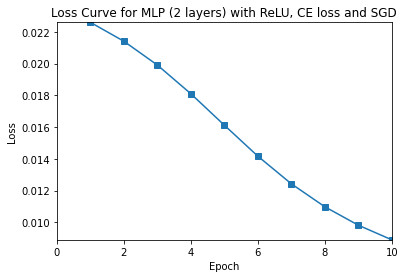

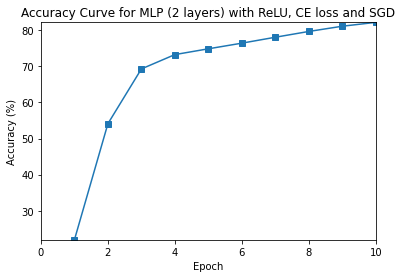

In [6]:
# Cross Entropy loss
criterion = nn.CrossEntropyLoss()
# Stochastic Gradient Descent as optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=args["learning_rate"])
# Training
loss_and_acc_dict = train(model, train_loader, optimizer, criterion, args)
# Testing
test(model, test_loader, args["batch_size"])
# Plotting the results
plot_loss_and_acc(loss_and_acc_dict, "MLP (2 layers) with ReLU, CE loss and SGD", "MLP1")

### 2. MLP with 2 layers (Sigmoid activation, CE loss and SGD optimizer)

In [7]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 128),
            nn.Sigmoid(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.layers(x)

        return x
        
model = MLP()

 10%|█         | 1/10 [00:03<00:28,  3.21s/it]
 Epoch 1 --> Training Loss: 0.023059474304318428 | Accuracy: 11.466666221618652%

 20%|██        | 2/10 [00:06<00:25,  3.21s/it]
 Epoch 2 --> Training Loss: 0.022782566025853157 | Accuracy: 13.854999542236328%

 30%|███       | 3/10 [00:09<00:22,  3.17s/it]
 Epoch 3 --> Training Loss: 0.02262137457728386 | Accuracy: 21.378334045410156%

 40%|████      | 4/10 [00:12<00:18,  3.15s/it]
 Epoch 4 --> Training Loss: 0.02245749905705452 | Accuracy: 29.0483341217041%

 50%|█████     | 5/10 [00:15<00:15,  3.15s/it]
 Epoch 5 --> Training Loss: 0.022286532446742058 | Accuracy: 35.21500015258789%

 60%|██████    | 6/10 [00:18<00:12,  3.13s/it]
 Epoch 6 --> Training Loss: 0.022106217220425606 | Accuracy: 40.0533332824707%

 70%|███████   | 7/10 [00:21<00:09,  3.12s/it]
 Epoch 7 --> Training Loss: 0.02191450074315071 | Accuracy: 44.163333892822266%

 80%|████████  | 8/10 [00:24<00:06,  3.10s/it]
 Epoch 8 --> Training Loss: 0.02170943282544613 | Accuracy

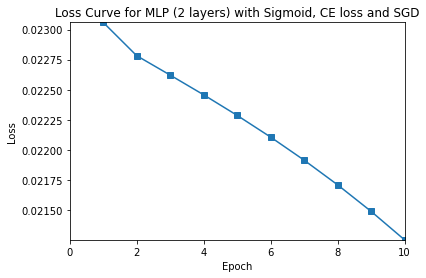

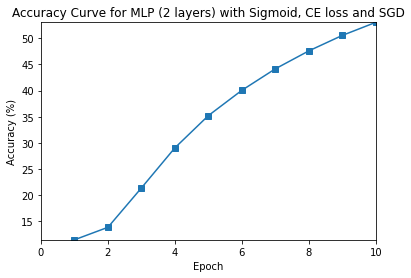

In [8]:
# Cross Entropy loss
criterion = nn.CrossEntropyLoss()
# Stochastic Gradient Descent optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=args["learning_rate"])
# Training
loss_and_acc_dict = train(model, train_loader, optimizer, criterion, args)
# Testing
test(model, test_loader, args["batch_size"])
# Plotting the results
plot_loss_and_acc(loss_and_acc_dict, "MLP (2 layers) with Sigmoid, CE loss and SGD", "MLP2")

### 3. MLP with 2 layers (ReLU activation, CE loss and Adam optimizer)

In [9]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.layers(x)

        return x
        
model = MLP()

 10%|█         | 1/10 [00:03<00:29,  3.30s/it]
 Epoch 1 --> Training Loss: 0.004030116833746433 | Accuracy: 89.19833374023438%

 20%|██        | 2/10 [00:06<00:26,  3.30s/it]
 Epoch 2 --> Training Loss: 0.0018989318050444126 | Accuracy: 94.52999877929688%

 30%|███       | 3/10 [00:09<00:23,  3.33s/it]
 Epoch 3 --> Training Loss: 0.0013433228014037013 | Accuracy: 96.13333129882812%

 40%|████      | 4/10 [00:13<00:20,  3.35s/it]
 Epoch 4 --> Training Loss: 0.0010257733520120382 | Accuracy: 97.01667022705078%

 50%|█████     | 5/10 [00:16<00:16,  3.36s/it]
 Epoch 5 --> Training Loss: 0.0008189694490283728 | Accuracy: 97.64167022705078%

 60%|██████    | 6/10 [00:20<00:13,  3.36s/it]
 Epoch 6 --> Training Loss: 0.0006704358384013176 | Accuracy: 98.086669921875%

 70%|███████   | 7/10 [00:23<00:10,  3.37s/it]
 Epoch 7 --> Training Loss: 0.0005541706341318786 | Accuracy: 98.43000030517578%

 80%|████████  | 8/10 [00:26<00:06,  3.38s/it]
 Epoch 8 --> Training Loss: 0.0004630657786037773 | A

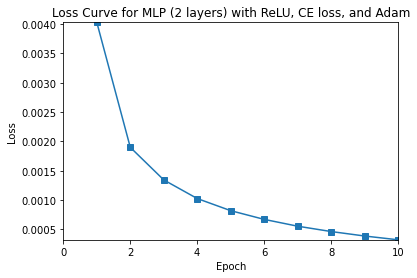

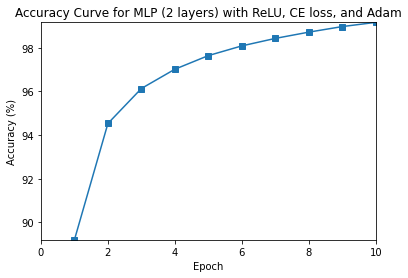

In [10]:
# Cross Entropy loss
criterion = nn.CrossEntropyLoss()
# Stochastic Gradient Descent optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=args["learning_rate"])
# Training
loss_and_acc_dict = train(model, train_loader, optimizer, criterion, args)
# Testing
test(model, test_loader, args["batch_size"])
# Plotting the results
plot_loss_and_acc(loss_and_acc_dict, "MLP (2 layers) with ReLU, CE loss, and Adam", "MLP3")

### 4. MLP with 3 layers (ReLU activation, CE loss and Adam optimizer)

In [11]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 576),
            nn.ReLU(),
            nn.Linear(576, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.layers(x)

        return x
        
model = MLP()

 10%|█         | 1/10 [00:03<00:35,  4.00s/it]
 Epoch 1 --> Training Loss: 0.0029792014975100756 | Accuracy: 91.3116683959961%

 20%|██        | 2/10 [00:07<00:31,  4.00s/it]
 Epoch 2 --> Training Loss: 0.001116060884669423 | Accuracy: 96.58499908447266%

 30%|███       | 3/10 [00:11<00:27,  4.00s/it]
 Epoch 3 --> Training Loss: 0.0006830694037489593 | Accuracy: 97.9000015258789%

 40%|████      | 4/10 [00:15<00:23,  4.00s/it]
 Epoch 4 --> Training Loss: 0.00044841287308372557 | Accuracy: 98.62000274658203%

 50%|█████     | 5/10 [00:19<00:20,  4.00s/it]
 Epoch 5 --> Training Loss: 0.00031980188214220107 | Accuracy: 99.01499938964844%

 60%|██████    | 6/10 [00:23<00:15,  4.00s/it]
 Epoch 6 --> Training Loss: 0.00024035302340053022 | Accuracy: 99.26667022705078%

 70%|███████   | 7/10 [00:28<00:12,  4.00s/it]
 Epoch 7 --> Training Loss: 0.00024267303524538875 | Accuracy: 99.15499877929688%

 80%|████████  | 8/10 [00:32<00:08,  4.00s/it]
 Epoch 8 --> Training Loss: 0.0001938011700985953

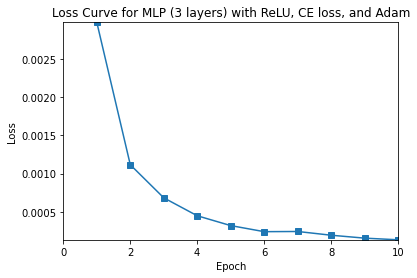

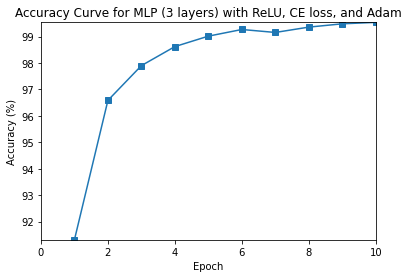

In [12]:
# Cross Entropy loss
criterion = nn.CrossEntropyLoss()
# Stochastic Gradient Descent optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=args["learning_rate"])
# Training
loss_and_acc_dict = train(model, train_loader, optimizer, criterion, args)
# Testing
test(model, test_loader, args["batch_size"])
# Plotting the results
plot_loss_and_acc(loss_and_acc_dict, "MLP (3 layers) with ReLU, CE loss, and Adam", "MLP4")

## Convolutional Neural Network (ConvNet)

### 1. CNN with 2 layers (ReLU activation, CE loss and SGD optimizer)

In [13]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, padding=1),
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, padding=1),
        )
        self.linear_layers = nn.Sequential(
            nn.Linear(16 * 8 * 8, 100), nn.ReLU(inplace=True), nn.Linear(100, 10)
        )

    def forward(self, x):
        batch_size = x.size(0)
        x = self.conv_layers(x)
        x = x.view(batch_size, -1)
        x = self.linear_layers(x)

        return x

model = ConvNet()

 10%|█         | 1/10 [00:04<00:43,  4.88s/it]
 Epoch 1 --> Training Loss: 0.023005377501249313 | Accuracy: 11.22166633605957%

 20%|██        | 2/10 [00:09<00:39,  4.89s/it]
 Epoch 2 --> Training Loss: 0.022928951308131218 | Accuracy: 18.190000534057617%

 30%|███       | 3/10 [00:14<00:34,  4.88s/it]
 Epoch 3 --> Training Loss: 0.02284170314669609 | Accuracy: 21.198333740234375%

 40%|████      | 4/10 [00:19<00:29,  4.86s/it]
 Epoch 4 --> Training Loss: 0.02271200157701969 | Accuracy: 26.014999389648438%

 50%|█████     | 5/10 [00:24<00:24,  4.84s/it]
 Epoch 5 --> Training Loss: 0.02249397709965706 | Accuracy: 42.90999984741211%

 60%|██████    | 6/10 [00:29<00:19,  4.83s/it]
 Epoch 6 --> Training Loss: 0.022075379267334938 | Accuracy: 53.125%

 70%|███████   | 7/10 [00:33<00:14,  4.81s/it]
 Epoch 7 --> Training Loss: 0.02112444117665291 | Accuracy: 56.45500183105469%

 80%|████████  | 8/10 [00:38<00:09,  4.80s/it]
 Epoch 8 --> Training Loss: 0.018620675429701805 | Accuracy: 61.61500

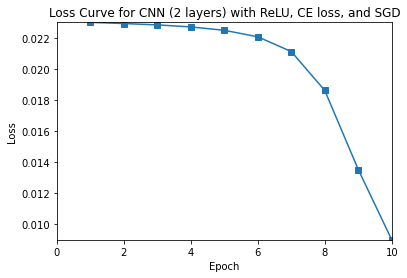

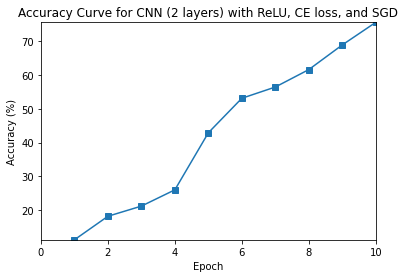

In [14]:
# Cross Entropy loss
criterion = nn.CrossEntropyLoss()
# Stochastic Gradient Descent optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=args["learning_rate"])
# Training
loss_and_acc_dict = train(model, train_loader, optimizer, criterion, args)
# Testing
test(model, test_loader, args["batch_size"])
# Plotting the results
plot_loss_and_acc(loss_and_acc_dict, "CNN (2 layers) with ReLU, CE loss, and SGD", "CNN1")

### 2. CNN with 2 layers (Sigmoid activation, CE loss and SGD optimizer)

In [15]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, padding=1),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, padding=1),
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, padding=1),
        )
        self.linear_layers = nn.Sequential(
            nn.Linear(16 * 8 * 8, 100), nn.ReLU(inplace=True), nn.Linear(100, 10)
        )

    def forward(self, x):
        batch_size = x.size(0)
        x = self.conv_layers(x)
        x = x.view(batch_size, -1)
        x = self.linear_layers(x)

        return x

model = ConvNet()

 10%|█         | 1/10 [00:05<00:45,  5.04s/it]
 Epoch 1 --> Training Loss: 0.023048242554068565 | Accuracy: 10.109999656677246%

 20%|██        | 2/10 [00:09<00:39,  4.98s/it]
 Epoch 2 --> Training Loss: 0.023014575242996216 | Accuracy: 11.083333015441895%

 30%|███       | 3/10 [00:14<00:34,  4.90s/it]
 Epoch 3 --> Training Loss: 0.0230119451880455 | Accuracy: 11.236666679382324%

 40%|████      | 4/10 [00:19<00:29,  4.85s/it]
 Epoch 4 --> Training Loss: 0.02301149256527424 | Accuracy: 11.236666679382324%

 50%|█████     | 5/10 [00:24<00:24,  4.82s/it]
 Epoch 5 --> Training Loss: 0.023011241108179092 | Accuracy: 11.236666679382324%

 60%|██████    | 6/10 [00:28<00:19,  4.79s/it]
 Epoch 6 --> Training Loss: 0.023011093959212303 | Accuracy: 11.236666679382324%

 70%|███████   | 7/10 [00:33<00:14,  4.77s/it]
 Epoch 7 --> Training Loss: 0.023010950535535812 | Accuracy: 11.236666679382324%

 80%|████████  | 8/10 [00:38<00:09,  4.77s/it]
 Epoch 8 --> Training Loss: 0.023010805249214172 | Ac

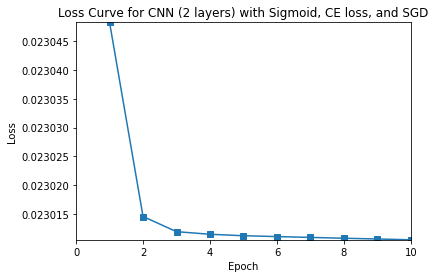

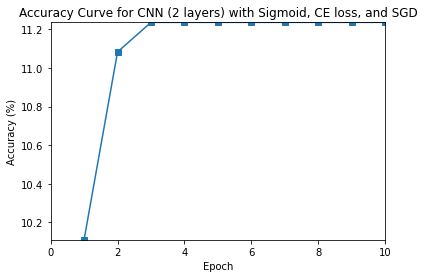

In [16]:
# Cross Entropy loss
criterion = nn.CrossEntropyLoss()
# Stochastic Gradient Descent optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=args["learning_rate"])
# Training
loss_and_acc_dict = train(model, train_loader, optimizer, criterion, args)
# Testing
test(model, test_loader, args["batch_size"])
# Plotting the results
plot_loss_and_acc(loss_and_acc_dict, "CNN (2 layers) with Sigmoid, CE loss, and SGD", "CNN2")

### 3. CNN with 2 layers (ReLU activation, CE loss and Adam optimizer)

In [17]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, padding=1),
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, padding=1),
        )
        self.linear_layers = nn.Sequential(
            nn.Linear(16 * 8 * 8, 100), nn.ReLU(inplace=True), nn.Linear(100, 10)
        )

    def forward(self, x):
        batch_size = x.size(0)
        x = self.conv_layers(x)
        x = x.view(batch_size, -1)
        x = self.linear_layers(x)

        return x

model = ConvNet()

 10%|█         | 1/10 [00:05<00:49,  5.54s/it]
 Epoch 1 --> Training Loss: 0.0040216450579464436 | Accuracy: 88.23666381835938%

 20%|██        | 2/10 [00:11<00:44,  5.53s/it]
 Epoch 2 --> Training Loss: 0.0011361581273376942 | Accuracy: 96.5250015258789%

 30%|███       | 3/10 [00:16<00:38,  5.52s/it]
 Epoch 3 --> Training Loss: 0.000758582551497966 | Accuracy: 97.67166900634766%

 40%|████      | 4/10 [00:22<00:33,  5.51s/it]
 Epoch 4 --> Training Loss: 0.0005764191155321896 | Accuracy: 98.25666809082031%

 50%|█████     | 5/10 [00:27<00:27,  5.50s/it]
 Epoch 5 --> Training Loss: 0.0004649564507417381 | Accuracy: 98.58999633789062%

 60%|██████    | 6/10 [00:32<00:21,  5.48s/it]
 Epoch 6 --> Training Loss: 0.000387174281058833 | Accuracy: 98.84500122070312%

 70%|███████   | 7/10 [00:38<00:16,  5.48s/it]
 Epoch 7 --> Training Loss: 0.00032606301829218864 | Accuracy: 99.05833435058594%

 80%|████████  | 8/10 [00:43<00:10,  5.45s/it]
 Epoch 8 --> Training Loss: 0.0002743209770414978 | 

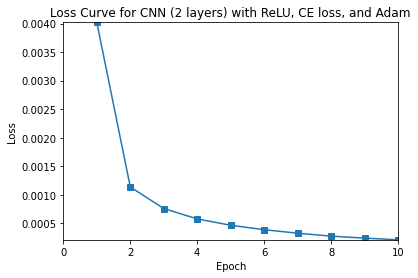

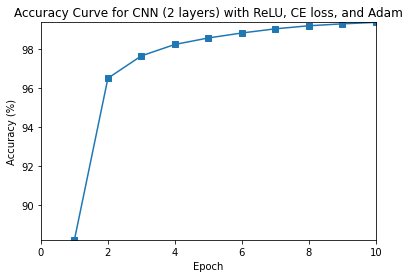

In [18]:
# Cross Entropy loss
criterion = nn.CrossEntropyLoss()
# Stochastic Gradient Descent optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=args["learning_rate"])
# Training
loss_and_acc_dict = train(model, train_loader, optimizer, criterion, args)
# Testing
test(model, test_loader, args["batch_size"])
# Plotting the results
plot_loss_and_acc(loss_and_acc_dict, "CNN (2 layers) with ReLU, CE loss, and Adam", "CNN3")

### 4. CNN with 3 layers (ReLU activation, CE loss and Adam optimizer)

In [22]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, padding=1),
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, padding=1),
            nn.Conv2d(16, 24, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, padding=1),
        )
        self.linear_layers = nn.Sequential(
            nn.Linear(600, 100), nn.ReLU(inplace=True), nn.Linear(100, 10)
        )

    def forward(self, x):
        batch_size = x.size(0)
        x = self.conv_layers(x)
        x = x.view(batch_size, -1)
        x = self.linear_layers(x)

        return x

model = ConvNet()

 10%|█         | 1/10 [00:06<01:00,  6.73s/it]
 Epoch 1 --> Training Loss: 0.004515271168202162 | Accuracy: 85.7300033569336%

 20%|██        | 2/10 [00:13<00:53,  6.71s/it]
 Epoch 2 --> Training Loss: 0.0012737824581563473 | Accuracy: 96.0%

 30%|███       | 3/10 [00:19<00:46,  6.66s/it]
 Epoch 3 --> Training Loss: 0.0009124145144596696 | Accuracy: 97.10832977294922%

 40%|████      | 4/10 [00:26<00:39,  6.63s/it]
 Epoch 4 --> Training Loss: 0.0007116257329471409 | Accuracy: 97.73666381835938%

 50%|█████     | 5/10 [00:33<00:33,  6.62s/it]
 Epoch 5 --> Training Loss: 0.0005897399969398975 | Accuracy: 98.07166290283203%

 60%|██████    | 6/10 [00:39<00:26,  6.61s/it]
 Epoch 6 --> Training Loss: 0.0004969262517988682 | Accuracy: 98.48999786376953%

 70%|███████   | 7/10 [00:46<00:19,  6.59s/it]
 Epoch 7 --> Training Loss: 0.00042420485988259315 | Accuracy: 98.70166778564453%

 80%|████████  | 8/10 [00:52<00:13,  6.57s/it]
 Epoch 8 --> Training Loss: 0.00037123088259249926 | Accuracy: 9

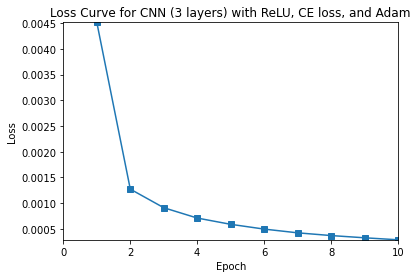

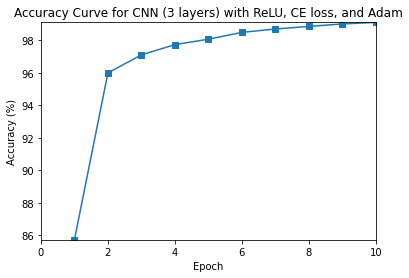

In [23]:
# Cross Entropy loss
criterion = nn.CrossEntropyLoss()
# Stochastic Gradient Descent optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=args["learning_rate"])
# Training
loss_and_acc_dict = train(model, train_loader, optimizer, criterion, args)
# Testing
test(model, test_loader, args["batch_size"])
# Plotting the results
plot_loss_and_acc(loss_and_acc_dict, "CNN (3 layers) with ReLU, CE loss, and Adam", "CNN4")